#Expansión de la serie Taylor con Python

En este blog, quiero revisar la famosa expansión de la serie Taylor y su caso especial de expansión de la serie Maclaurin. De acuerdo a wikipedia, el objetivo de Taylor Series Expansion (TSE) es representar una función como una suma infinita de términos que se derivan de los valores de las derivadas de esa función, que a su vez se evalúan en algún punto único predefinido. En otras palabras, al usar TSE, intentamos representar alguna función dada como una suma infinita de sus derivadas y estas derivadas se evalúan en algún punto único que podemos elegir. Antes de sumergirnos en la mecánica de TSE y su caso especial de expansión de la serie Maclaurin (MSE), vale la pena conocer algo de la historia detrás de estos tipos. En el siglo XVII, el matemático **James Gregory** introdujo por primera vez el concepto de expansión , pero en 1715 **Brook Taylor** introdujo formalmente la noción de expansión de funciones .

Una serie de Taylor unidimensional es una expansión de una función real 𝔽(x) sobre un punto x=a es dado por:

$$F(x) \thickapprox F(a)+F'(a)*(x-a)+\frac{1}{2!}*F''(a)*(x-a)^2 + \frac{1}{3!}*F^3(a)*(x-a)^3+...+\frac{1}{n!}*F^n(a)*(x-a)^n$$

Dónde, n! denota el factorial de n y $F^n(a)$ denota enésima derivada de F evaluado en el punto a. Cada término del lado derecho denota el orden de expansión de Taylor. Por ejemplo, $F(a)$ es la expansión de orden cero y $F′(a)*(x-a)es la expansión de primer orden. La representación anterior se llama representación de forma abierta de una expansión.

Podemos escribir esta expansión en notación más compacta de la siguiente manera:

$$\sum_{n=0}^\infty = \frac{F^n(a)}{n!}*(x-a)^n$$

Ésta es la representación de forma cerrada de una expansión.

Para ver la intuición, repasemos algún ejemplo. Me interesa cuál es la expansión de Taylor de orden 3 de cos(x) a x = a. Para seguir la definición anterior tenemos:

$$F(x) = cos(x)$$
$$cos(x)\ \thickapprox\ cos(a) - sen(a)*(x-a)-\frac{1}{2}*cos(a)*(x-a)^2+\frac{1}{6}*sen(a)*(x-a)^3$$

Preguntas, que es a y como podemos elegirlo? $a$ es el punto donde queremos tener $cosine$ aproximación y puede ser cualquier número de $-\infty$ a $+\infty$. Tenga en cuenta que este no es el caso de otras funciones. Estamos restringidos a elegiradel dominio de una función dada.

Ahora, hagamos una aproximación de Taylor para sin(x) a x=a

$$F(x)=sen(x)$$
$$sen(x)\ \thickapprox\ sen(a) - cos(a)*(x-a)+\frac{1}{2}*sen(a)*(x-a)^2 -\frac{1}{6}*cos(a)*(x-a)^3$$

Podemos ir más allá y hacer una expansión de la serie de Taylor para el exponente esx a x=a es

$$F(x)=e^x$$
$$e^x\ \thickapprox\ e^a+e^a*(x-a)+\frac{1}{2}*e^a*(x-a)^2+\frac{1}{6}*e^a*(x-a)^3$$

Como tenemos tres aproximaciones de funciones, elija el valor para a y ponerlo a cero y ver qué tendremos.

por cos(x) dónde x = a = 0 tenemos:

$$cos(x=1-\frac{1}{2}x^2$$

para sin(x) a x=a=0 tenemos:

$$sen(x)=x-\frac{1}{6}x^3$$

por esx dónde x=a=0 tenemos:

$$e^x = 1+x+\frac{1}{2}x^2+\frac{1}{6}x^3$$

Este tipo de expansión se conoce como expansión en serie de Maclaurin , es decir, cuando el punto de aproximación es cero lo llamamos expansión de Maclaurin.

Calcular la aproximación de tercer orden para estas funciones a mano no parece demasiado difícil, pero para un orden superior es tedioso. Para resolver este problema podemos usar Python, a saber, Sympy si queremos tener una aproximación simbólica, o Numpy / Scipy para tener una aproximación numérica. No confundir con aproximación numérica y punto de aproximación. Aa=0 para la función $F(x)=e^x$ teníamos aproximación de Taylor $e^x = 1+x+\frac{1}{2}x^2+\frac{1}{6}x^3$. Si evaluamos esta expresión en, digamos x=1 tenemos salida de función. En esta configuración,

$$F(x) = e^x\ \thickapprox\ 1 + x + \frac{1}{2}x^2 + \frac{1}{6} x^3 |_{x=1} $$
y evaluado en x=1 tenemos $F(1)= e =2.71828182\\thickapprox\ 2.66666666$, que está cerca de la salida real.

Ahora visualicemos estas funciones y sus aproximaciones de Taylor en diferentes puntos con un orden de expansión diferente. Antes de visualizar los resultados, es bueno tener una función que haga una expansión de Taylor simbólica para órdenes superiores para funciones de una variable. Para funciones multivariables, depende de usted.



In [20]:
#Copy
from sympy import series, Symbol
from sympy.functions import sin, cos, exp
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [21]:
#Copy
# Define symbol
x = Symbol('x')

In [22]:
#Copy
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    El parámetro "función" es nuestra función que queremos 
    aproximar "x0" es el punto de aproximación "n" es el 
    orden de aproximación
    """
    return function.series(x,x0,n).removeO()

While defining "taylor" function, in return statement I used ".removeO()" method. This method is used in series expansion to remove $O(x^n)$ term, which is Landau order term at x=0 and not to be confused with big O notation used in computer science, which generally represents the Landau order term at $x=\infty$.

We can do sin(x), cos(x), and e(x) expansion by using Sympy.

In [23]:
#Copy
c=5
print('sin(x) =', taylor(sin(x), 0, c))

print('cos(x) =', taylor(cos(x), 0, c))

print('e(x) =', taylor(exp(x), 0, c))

sin(x) = -x**3/6 + x
cos(x) = x**4/24 - x**2/2 + 1
e(x) = x**4/24 + x**3/6 + x**2/2 + x + 1


That's not all. We can evaluate these functions at any point. For instance as we did above for x=1


In [24]:
#Copy
h=1/2
print('sin(',h,') =', taylor(sin(x), 0, c).subs(x,h))

print('cos(',h,') =', taylor(cos(x), 0, c).subs(x,h))

print('e(',h,') =', taylor(exp(x), 0, c).subs(x,h))

sin( 0.5 ) = 0.479166666666667
cos( 0.5 ) = 0.877604166666667
e( 0.5 ) = 1.64843750000000


As we have all the necessary tools to visualize the results, let do it.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


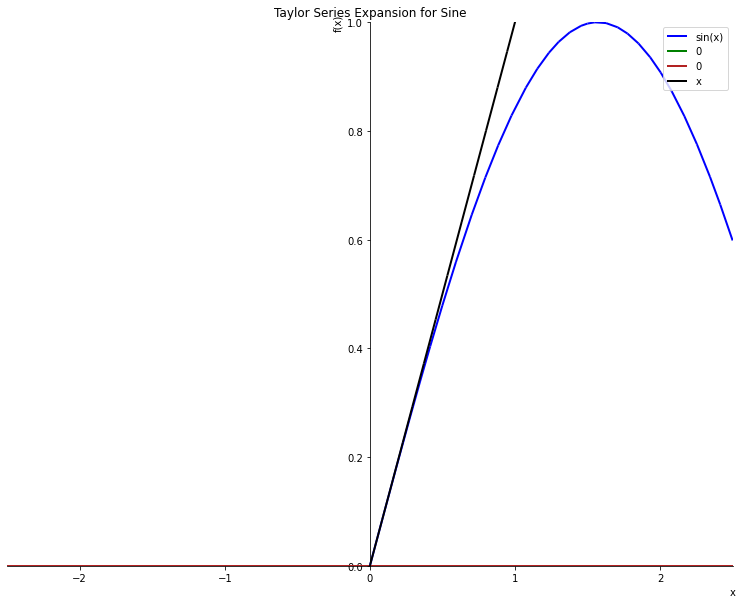

In [25]:
#Copy
# This will plot sine and its Taylor approximations

p = plot(sin(x),taylor(sin(x),0,h),taylor(sin(x),0,h*2),taylor(sin(x),0,h*4),
         (x,-2.5,2.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Sine'
p.show()

##Taylor Expansion for Cosine

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


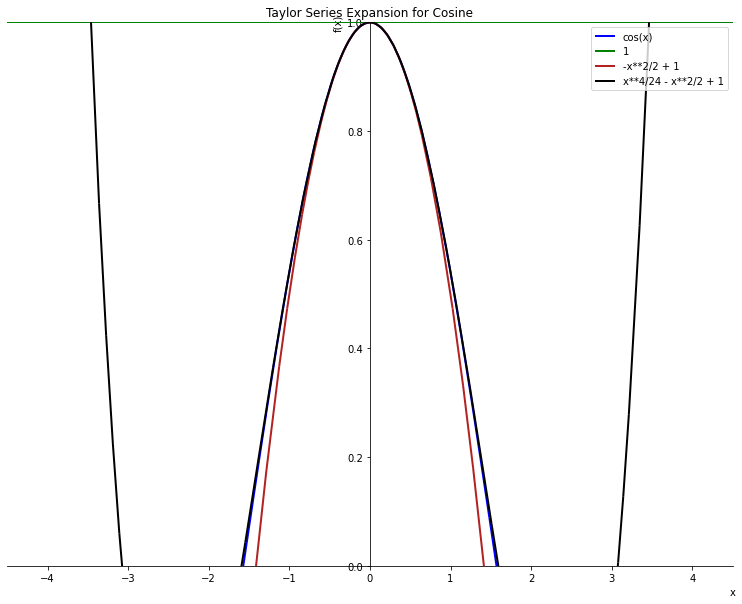

In [26]:
#Copy
# This will plot cosine and its Taylor approximations

p = plot(cos(x),taylor(cos(x),0,2),taylor(cos(x),0,4),taylor(cos(x),0,6),
         (x,-4.5,4.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Cosine'
p.show()

##aylor Expansion for Exponent

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


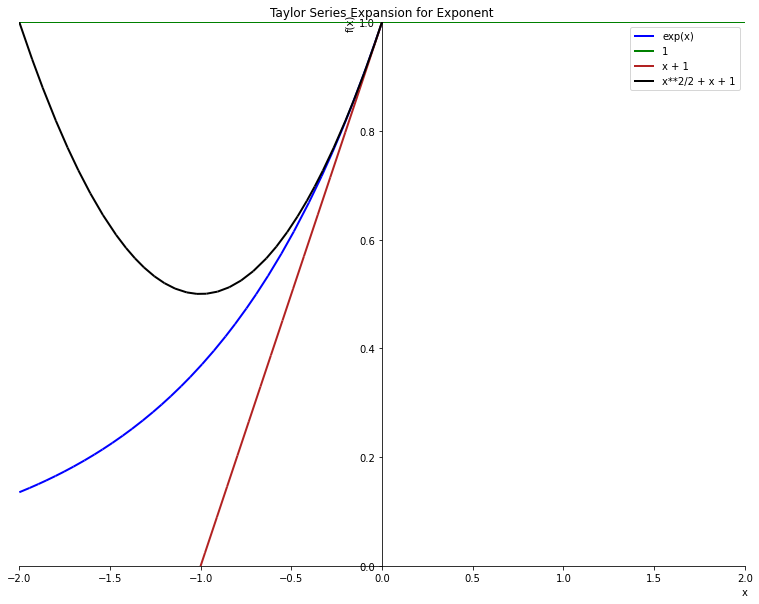

In [27]:
#Copy
# This will plot exponent and its Taylor approximations

p = plot(exp(x),taylor(exp(x),0,1),taylor(exp(x),0,2),taylor(exp(x),0,3),
         (x,-2,2),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Exponent'
p.show()

To conclude, in this post we saw how the Taylor series expansion works and coded it in Python. Taylor series expansion while approximating a function introduces approximation error. The magnitude of error depends on the approximation order. If we increase the order of approximation, the error term will decrease, or we can set the tolerance level for error in advance. In other words, the error term in approximation can be regarded as Nth order Remainder term.

For F(x) at x=x0=a the remainder term is defined as:

$$R_n(x)=F(x)-P_n(x)$$

Where, Pn(x) is the Nth order Taylor polynomial for 𝔽(x) at x=x0=a. So,

$$F(x)=P_n(x)+R_n(x)$$

You may wonder why you need Taylor expansion, but it's very important concept in mathematics and one of mathematical beauty, Euler's Identity is derived from Taylor series expansion of cos(x), sin(x), and e(x). The derivation of Euler's Identity deserves separate post, but if you want to see the derivation, you can take a look at Khan Academy. Moreover, some training algorithms for neural networks, such as Steepest Descent, Newton's method, and Conjugate Gradient uses first or second order Taylor series expansion to minimize performance index.
